In [103]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from importlib import reload
from sklearn.feature_selection import VarianceThreshold
from collections import Counter
from sklearn.model_selection import cross_val_score

# Data Processing

#### No named columns, so we have to labelize them 

In [3]:
labels_file = pd.read_csv('features_names.csv', sep=';', encoding='utf-8')
labels = labels_file.data_type
list(labels)
len(list(labels))

54

In [5]:
labels

0          Page Popularity Likes
1                  Page Checkins
2             Page Talking About
3                  Page Category
4                        CC1 Min
5                        CC1 Max
6                        CC1 Avg
7                     CC1 Median
8                        CC1 Std
9                        CC2 Min
10                       CC2 Max
11                       CC2 Avg
12                    CC2 Median
13                       CC2 Std
14                       CC3 Min
15                       CC3 Max
16                       CC3 Avg
17                    CC3 Median
18                       CC3 Std
19                       CC4 Min
20                       CC4 Max
21                       CC4 Avg
22                    CC4 Median
23                       CC4 Std
24                       CC5 Min
25                       CC5 Max
26                       CC5 Avg
27                    CC5 Median
28                       CC5 Std
29                           CC1
30        

In [6]:
df1 = pd.read_csv('.\Dataset\Training\Features_Variant_1.csv', names = list(labels))
df2 = pd.read_csv('.\Dataset\Training\Features_Variant_2.csv', names = list(labels))
df3 = pd.read_csv('.\Dataset\Training\Features_Variant_3.csv', names = list(labels))
df4 = pd.read_csv('.\Dataset\Training\Features_Variant_4.csv', names = list(labels))
df5 = pd.read_csv('.\Dataset\Training\Features_Variant_5.csv', names = list(labels))

In [7]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [8]:
pd.options.display.max_rows = None
print(df1.dtypes)
pd.options.display.max_rows = 100

Page Popularity Likes           int64
Page Checkins                   int64
Page Talking About              int64
Page Category                   int64
CC1 Min                       float64
CC1 Max                       float64
CC1 Avg                       float64
CC1 Median                    float64
CC1 Std                       float64
CC2 Min                       float64
CC2 Max                       float64
CC2 Avg                       float64
CC2 Median                    float64
CC2 Std                       float64
CC3 Min                       float64
CC3 Max                       float64
CC3 Avg                       float64
CC3 Median                    float64
CC3 Std                       float64
CC4 Min                       float64
CC4 Max                       float64
CC4 Avg                       float64
CC4 Median                    float64
CC4 Std                       float64
CC5 Min                       float64
CC5 Max                       float64
CC5 Avg     

### Correlation between feature pre-processed

In [9]:
corr_matrix = df5.corr()
df5.shape

(199030, 54)

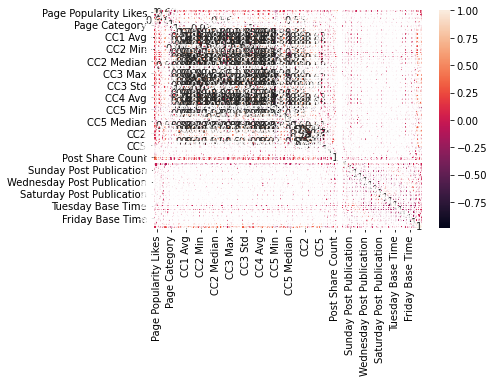

In [10]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

Let's see the features high correlated with the Target Variable (last column)

In [11]:
corr_matrix.iloc[53].sort_values(ascending=False)

Target Variable               1.000000
CC2                           0.545260
CC5                           0.375318
CC2 Avg                       0.368003
CC1 Avg                       0.359536
CC3 Avg                       0.356985
CC4 Avg                       0.356769
CC1 Median                    0.349452
CC4 Median                    0.348033
CC4                           0.342653
CC5 Std                       0.339319
CC2 Median                    0.339229
CC3 Std                       0.333375
CC2 Std                       0.329067
CC1                           0.327086
CC1 Std                       0.316593
CC4 Std                       0.309988
CC3 Median                    0.303185
CC1 Max                       0.238743
CC3 Max                       0.234408
CC4 Max                       0.232497
CC5 Max                       0.230101
CC2 Max                       0.229139
Page Talking About            0.194768
CC5 Avg                       0.192558
CC2 Min                  

We can see than there are features which have a positive linear relation with the target value. We select 6 columns with the most significant weight : "Target Variable", "CC2", "CC5", "CC2 Avg", "CC1 Avg", "CC3 Avg", "CC4 Avg"


CC1 : The total number of comments before selected base date/time.

CC2 : The number of comments in last 24 hours, relative to base date/time.

CC3 : The number of comments in last 48 to last 24 hours relative to base date/time.

CC4 : The number of comments in the first 24 hours after the publication of post but before base date/time.

CC5 : The difference between CC2 and CC3.

array([[<AxesSubplot:xlabel='Target Variable', ylabel='Target Variable'>,
        <AxesSubplot:xlabel='CC2', ylabel='Target Variable'>,
        <AxesSubplot:xlabel='CC5', ylabel='Target Variable'>,
        <AxesSubplot:xlabel='CC2 Avg', ylabel='Target Variable'>,
        <AxesSubplot:xlabel='CC1 Avg', ylabel='Target Variable'>,
        <AxesSubplot:xlabel='CC3 Avg', ylabel='Target Variable'>,
        <AxesSubplot:xlabel='CC4 Avg', ylabel='Target Variable'>],
       [<AxesSubplot:xlabel='Target Variable', ylabel='CC2'>,
        <AxesSubplot:xlabel='CC2', ylabel='CC2'>,
        <AxesSubplot:xlabel='CC5', ylabel='CC2'>,
        <AxesSubplot:xlabel='CC2 Avg', ylabel='CC2'>,
        <AxesSubplot:xlabel='CC1 Avg', ylabel='CC2'>,
        <AxesSubplot:xlabel='CC3 Avg', ylabel='CC2'>,
        <AxesSubplot:xlabel='CC4 Avg', ylabel='CC2'>],
       [<AxesSubplot:xlabel='Target Variable', ylabel='CC5'>,
        <AxesSubplot:xlabel='CC2', ylabel='CC5'>,
        <AxesSubplot:xlabel='CC5', ylabel='CC5

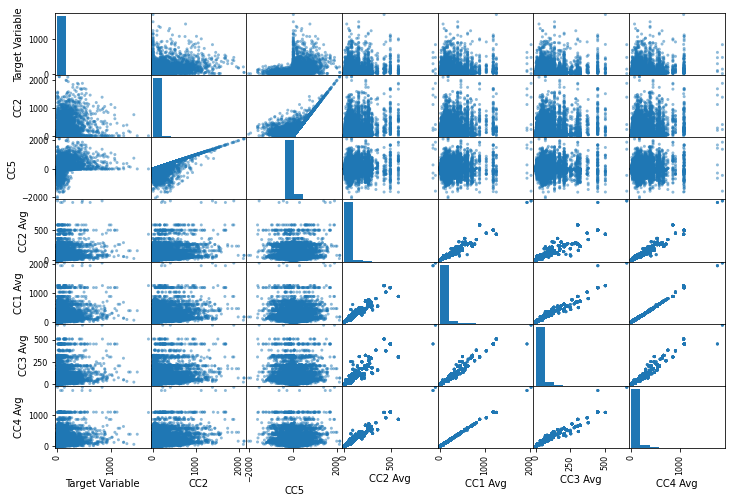

In [12]:
features = ["Target Variable", "CC2", "CC5", "CC2 Avg", "CC1 Avg", "CC3 Avg", "CC4 Avg"]
scatter_matrix(df5[features], figsize=(12,8))

It seems like the number of posts received over time has a constant speed. 

### Feature 4 category names handling with the file joined to the dataset 

In [13]:
print(sorted(df1['Page Category'].unique()))
max(df1['Page Category'].unique())

[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 47, 49, 50, 51, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 66, 67, 68, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 87, 89, 90, 91, 92, 93, 96, 100, 101, 105, 106]


106

In [14]:
feature4_category = ['Product/service', 'Public figure', 'Retail and consumer merchandise', 'Athlete', 'Education website', 'Arts/entertainment/nightlife', 'Aerospace/defense', 'Actor/director', 'Professional sports team', 'Travel/leisure', 'Arts/humanities website', 'Food/beverages', 'Record label', 'Movie', 'Song', 'Community', 'Company', 'Artist', 'Non-governmental organization (ngo)', 'Media/news/publishing', 'Cars', 'Clothing', 'Local business', 'Musician/band', 'Politician', 'News/media website', 'Education', 'Author', 'Sports event', 'Restaurant/cafe', 'School sports team', 'University', 'Tv show', 'Website', 'Outdoor gear/sporting goods', 'Political party', 'Sports league', 'Entertainer', 'Church/religious organization', 'Non-profit organization', 'Automobiles and parts', 'Tv channel', 'Telecommunication', 'Entertainment website', 'Shopping/retail', 'Personal blog', 'App page', 'Vitamins/supplements', 'Professional services', 'Movie theater', 'Software', 'Magazine', 'Electronics', 'School', 'Just for fun', 'Club', 'Comedian', 'Sports venue', 'Sports/recreation/activities', 'Publisher', 'Tv network', 'Health/medical/pharmacy', 'Studio', 'Home decor', 'Jewelry/watches', 'Writer', 'Health/beauty', 'Music video', 'Appliances', 'Computers/technology', 'Insurance company', 'Music award', 'Recreation/sports website', 'Reference website', 'Business/economy website', 'Bar', 'Album', 'Games/toys', 'Camera/photo', 'Book', 'Producer', 'Landmark', 'Cause', 'Organization', 'Tv/movie award', 'Hotel', 'Health/medical/pharmaceuticals', 'Transportation', 'Local/travel website', 'Musical instrument', 'Radio station', 'Other', 'Computers', 'Phone/tablet', 'Coach', 'Tools/equipment', 'Internet/software', 'Bank/financial institution', 'Society/culture website', 'Small business', 'News personality', 'Teens/kids website', 'Government official', 'Photographer', 'Spas/beauty/personal care', 'Video game']
len(feature4_category)

106

We create a new column where we match category names with our string list

In [15]:
def Category_Feature_Named(df):
    df['Page Category Name'] = ''
    for i in range(df.shape[0]):
        cat = df['Page Category'].iloc[i]
        df['Page Category Name'].iloc[i] = feature4_category[cat-1]

In [16]:
Category_Feature_Named(df1)
df1

c:\users\boule\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Page Popularity Likes,Page Checkins,Page Talking About,Page Category,CC1 Min,CC1 Max,CC1 Avg,CC1 Median,CC1 Std,CC2 Min,CC2 Max,CC2 Avg,CC2 Median,CC2 Std,CC3 Min,CC3 Max,CC3 Avg,CC3 Median,CC3 Std,CC4 Min,CC4 Max,CC4 Avg,CC4 Median,CC4 Std,CC5 Min,CC5 Max,CC5 Avg,CC5 Median,CC5 Std,CC1,CC2,CC3,CC4,CC5,Base Time,Post Length,Post Share Count,Post Promotion Status,HLocal,Sunday Post Publication,Monday Post Publication,Tuesday Post Publication,Wednesday Post Publication,Thursday Post Publication,Friday Post Publication,Saturday Post Publication,Sunday Base Time,Monday Base Time,Tuesday Base Time,Wednesday Base Time,Thursday Base Time,Friday Base Time,Saturday Base Time,Target Variable,Page Category Name
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Product/service
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,Product/service
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Product/service
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Product/service
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,Product/service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,269,14,58,240,-44,56,12,1511,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,Professional sports team
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,644,20,106,619,-86,53,149,1099,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,Professional sports team
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,620,620,0,620,620,19,120,2962,0,24,0,0,0,1,0,0,0,0,0,0,0,1,0,0,72,Professional sports team
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,629,189,440,588,-251,33,33,1383,0,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,28,Professional sports team


Let's check if the match did well

In [17]:
print(feature4_category[17])
df1[['Page Category','Page Category Name']].iloc[30000:30010]

Artist


,Page Category,Page Category Name
30000,18,Artist
30001,18,Artist
30002,18,Artist
30003,18,Artist
30004,18,Artist
30005,18,Artist
30006,18,Artist
30007,18,Artist
30008,18,Artist
30009,18,Artist


In [18]:
print(feature4_category[15])
df1[['Page Category','Page Category Name']].iloc[15000:15010]

Community


,Page Category,Page Category Name
15000,16,Community
15001,16,Community
15002,16,Community
15003,16,Community
15004,16,Community
15005,16,Community
15006,16,Community
15007,16,Community
15008,16,Community
15009,16,Community


### Weekdays Features 

40-46
Post published weekday,
Binary Encoding,
Weekdays feature,
This represents the day(Sunday...Saturday) on which the post was published.


47-53
Base DateTime weekday,
Binary Encoding,
Weekdays feature,
This represents the day(Sunday...Saturday) on selected base Date/Time.

*We want to transform this 14 binary columns in 2 string columns*

In [19]:
def Weekdays_Posted_Transform(df):
    df['Post published weekday'] = ''
    for i in range(df.shape[0]):
        if(df['Sunday Post Publication'].iloc[i] == 1):
            df['Post published weekday'].iloc[i] = 'Sunday'
    
        elif(df['Monday Post Publication'].iloc[i] == 1):
            df['Post published weekday'].iloc[i] = 'Monday'
        
        elif(df['Tuesday Post Publication'].iloc[i] == 1):
            df['Post published weekday'].iloc[i] = 'Tuesday'
        
        elif(df['Wednesday Post Publication'].iloc[i] == 1):
            df['Post published weekday'].iloc[i] = 'Wednesday'
    
        elif(df['Thursday Post Publication'].iloc[i] == 1):
            df['Post published weekday'].iloc[i] = 'Thursday'
    
        elif(df['Friday Post Publication'].iloc[i] == 1):
            df['Post published weekday'].iloc[i] = 'Friday'
        
        elif(df['Saturday Post Publication'].iloc[i] == 1):
            df['Post published weekday'].iloc[i] = 'Saturday'
        
        else:
            df['Post published weekday'].iloc[i] = 'ERROR'

In [20]:
Weekdays_Posted_Transform(df1)
df1

c:\users\boule\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Page Popularity Likes,Page Checkins,Page Talking About,Page Category,CC1 Min,CC1 Max,CC1 Avg,CC1 Median,CC1 Std,CC2 Min,CC2 Max,CC2 Avg,CC2 Median,CC2 Std,CC3 Min,CC3 Max,CC3 Avg,CC3 Median,CC3 Std,CC4 Min,CC4 Max,CC4 Avg,CC4 Median,CC4 Std,CC5 Min,CC5 Max,CC5 Avg,CC5 Median,CC5 Std,CC1,CC2,CC3,CC4,CC5,Base Time,Post Length,Post Share Count,Post Promotion Status,HLocal,Sunday Post Publication,Monday Post Publication,Tuesday Post Publication,Wednesday Post Publication,Thursday Post Publication,Friday Post Publication,Saturday Post Publication,Sunday Base Time,Monday Base Time,Tuesday Base Time,Wednesday Base Time,Thursday Base Time,Friday Base Time,Saturday Base Time,Target Variable,Page Category Name,Post published weekday
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Product/service,Wednesday
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,Product/service,Thursday
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Product/service,Friday
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Product/service,Friday
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,Product/service,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,269,14,58,240,-44,56,12,1511,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,Professional sports team,Wednesday
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,644,20,106,619,-86,53,149,1099,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,Professional sports team,Wednesday
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,620,620,0,620,620,19,120,2962,0,24,0,0,0,1,0,0,0,0,0,0,0,1,0,0,72,Professional sports team,Wednesday
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,629,189,440,588,-251,33,33,1383,0,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,28,Professional sports team,Wednesday


In [21]:
df1['Post published weekday'].unique()
#Checking if there is no 'ERROR' match

array(['Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Sunday',
       'Saturday'], dtype=object)

In [22]:
def Weekdays_BaseTime_Transform(df):
    df['Base Time weekday'] = ''
    for i in range(df.shape[0]):
        if(df['Sunday Base Time'].iloc[i] == 1):
            df['Base Time weekday'].iloc[i] = 'Sunday'
    
        elif(df['Monday Base Time'].iloc[i] == 1):
            df['Base Time weekday'].iloc[i] = 'Monday'
        
        elif(df['Tuesday Base Time'].iloc[i] == 1):
            df['Base Time weekday'].iloc[i] = 'Tuesday'
        
        elif(df['Wednesday Base Time'].iloc[i] == 1):
            df['Base Time weekday'].iloc[i] = 'Wednesday'
    
        elif(df['Thursday Base Time'].iloc[i] == 1):
            df['Base Time weekday'].iloc[i] = 'Thursday'
    
        elif(df['Friday Base Time'].iloc[i] == 1):
            df['Base Time weekday'].iloc[i] = 'Friday'
        
        elif(df['Saturday Base Time'].iloc[i] == 1):
            df['Base Time weekday'].iloc[i] = 'Saturday'
        
        else:
            df['Base Time weekday'].iloc[i] = 'ERROR'

In [23]:
Weekdays_BaseTime_Transform(df1)
df1

c:\users\boule\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Page Popularity Likes,Page Checkins,Page Talking About,Page Category,CC1 Min,CC1 Max,CC1 Avg,CC1 Median,CC1 Std,CC2 Min,CC2 Max,CC2 Avg,CC2 Median,CC2 Std,CC3 Min,CC3 Max,CC3 Avg,CC3 Median,CC3 Std,CC4 Min,CC4 Max,CC4 Avg,CC4 Median,CC4 Std,CC5 Min,CC5 Max,CC5 Avg,CC5 Median,CC5 Std,CC1,CC2,CC3,CC4,CC5,Base Time,Post Length,Post Share Count,Post Promotion Status,HLocal,Sunday Post Publication,Monday Post Publication,Tuesday Post Publication,Wednesday Post Publication,Thursday Post Publication,Friday Post Publication,Saturday Post Publication,Sunday Base Time,Monday Base Time,Tuesday Base Time,Wednesday Base Time,Thursday Base Time,Friday Base Time,Saturday Base Time,Target Variable,Page Category Name,Post published weekday,Base Time weekday
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Product/service,Wednesday,Saturday
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,Product/service,Thursday,Friday
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Product/service,Friday,Saturday
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Product/service,Friday,Monday
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,Product/service,Monday,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,269,14,58,240,-44,56,12,1511,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,Professional sports team,Wednesday,Friday
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,644,20,106,619,-86,53,149,1099,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,Professional sports team,Wednesday,Friday
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,620,620,0,620,620,19,120,2962,0,24,0,0,0,1,0,0,0,0,0,0,0,1,0,0,72,Professional sports team,Wednesday,Thursday
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,629,189,440,588,-251,33,33,1383,0,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,28,Professional sports team,Wednesday,Friday


In [24]:
df1['Base Time weekday'].unique()
#Checking if there is no 'ERROR' match

array(['Saturday', 'Friday', 'Monday', 'Wednesday', 'Sunday', 'Thursday',
       'Tuesday'], dtype=object)

### Removing binary columns

In [25]:
print(df1.columns)
df1.shape

Index(['Page Popularity Likes', 'Page Checkins', 'Page Talking About',
       'Page Category', 'CC1 Min', 'CC1 Max', 'CC1 Avg', 'CC1 Median',
       'CC1 Std', 'CC2 Min', 'CC2 Max', 'CC2 Avg', 'CC2 Median', 'CC2 Std',
       'CC3 Min', 'CC3 Max', 'CC3 Avg', 'CC3 Median', 'CC3 Std', 'CC4 Min',
       'CC4 Max', 'CC4 Avg', 'CC4 Median', 'CC4 Std', 'CC5 Min', 'CC5 Max',
       'CC5 Avg', 'CC5 Median', 'CC5 Std', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5',
       'Base Time', 'Post Length', 'Post Share Count', 'Post Promotion Status',
       'HLocal', 'Sunday Post Publication', 'Monday Post Publication',
       'Tuesday Post Publication', 'Wednesday Post Publication',
       'Thursday Post Publication', 'Friday Post Publication',
       'Saturday Post Publication', 'Sunday Base Time', 'Monday Base Time',
       'Tuesday Base Time', 'Wednesday Base Time', 'Thursday Base Time',
       'Friday Base Time', 'Saturday Base Time', 'Target Variable',
       'Page Category Name', 'Post published weekday', '

(40949, 57)

In [26]:
binary_feat = ['Sunday Post Publication', 'Monday Post Publication',
       'Tuesday Post Publication', 'Wednesday Post Publication',
       'Thursday Post Publication', 'Friday Post Publication',
       'Saturday Post Publication', 'Sunday Base Time', 'Monday Base Time',
       'Tuesday Base Time', 'Wednesday Base Time', 'Thursday Base Time',
       'Friday Base Time', 'Saturday Base Time']
df1.drop(columns=binary_feat, inplace= True)
df1.shape

(40949, 43)

### Data processing for the other variant tables

In [27]:
Category_Feature_Named(df2)
Weekdays_Posted_Transform(df2)
Weekdays_BaseTime_Transform(df2)
df2.drop(columns=binary_feat, inplace= True)
print('df2 done..')

Category_Feature_Named(df3)
Weekdays_Posted_Transform(df3)
Weekdays_BaseTime_Transform(df3)
df3.drop(columns=binary_feat, inplace= True)
print('df3 done..')

Category_Feature_Named(df4)
Weekdays_Posted_Transform(df4)
Weekdays_BaseTime_Transform(df4)
df4.drop(columns=binary_feat, inplace= True)
print('df4 done..')

Category_Feature_Named(df5)
Weekdays_Posted_Transform(df5)
Weekdays_BaseTime_Transform(df5)
df5.drop(columns=binary_feat, inplace= True)
print('df5 done..')

c:\users\boule\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


df2 done..
df3 done..
df4 done..
df5 done..


NameError: name 'df' is not defined

Don't look at this message. This error is just because we rename df by df1.

In [28]:
print(df1.shape,df2.shape,df3.shape,df4.shape,df5.shape)

(40949, 43) (81312, 43) (121098, 43) (160424, 43) (199030, 43)


### Reorder columns

In [30]:
cols = df1.columns.tolist()
cols

['Page Popularity Likes',
 'Page Checkins',
 'Page Talking About',
 'Page Category',
 'CC1 Min',
 'CC1 Max',
 'CC1 Avg',
 'CC1 Median',
 'CC1 Std',
 'CC2 Min',
 'CC2 Max',
 'CC2 Avg',
 'CC2 Median',
 'CC2 Std',
 'CC3 Min',
 'CC3 Max',
 'CC3 Avg',
 'CC3 Median',
 'CC3 Std',
 'CC4 Min',
 'CC4 Max',
 'CC4 Avg',
 'CC4 Median',
 'CC4 Std',
 'CC5 Min',
 'CC5 Max',
 'CC5 Avg',
 'CC5 Median',
 'CC5 Std',
 'CC1',
 'CC2',
 'CC3',
 'CC4',
 'CC5',
 'Base Time',
 'Post Length',
 'Post Share Count',
 'Post Promotion Status',
 'HLocal',
 'Target Variable',
 'Page Category Name',
 'Post published weekday',
 'Base Time weekday']

In [31]:
def reordering_col(df):
    reorder = ['Page Popularity Likes',
           'Page Checkins',
           'Page Talking About',
           'Page Category',
           'Page Category Name',
           'Base Time',
           'Post Length',
           'Post Share Count',
           'Post Promotion Status',
           'HLocal',
           'Post published weekday',
           'Base Time weekday',
           'CC1',
           'CC2',
           'CC3',
           'CC4',
           'CC5',
           'CC1 Min',
           'CC1 Max',
           'CC1 Avg',
           'CC1 Median',
           'CC1 Std',
           'CC2 Min',
           'CC2 Max',
           'CC2 Avg',
           'CC2 Median',
           'CC2 Std',
           'CC3 Min',
           'CC3 Max',
           'CC3 Avg',
           'CC3 Median',
           'CC3 Std',
           'CC4 Min',
           'CC4 Max',
           'CC4 Avg',
           'CC4 Median',
           'CC4 Std',
           'CC5 Min',
           'CC5 Max',
           'CC5 Avg',
           'CC5 Median',
           'CC5 Std',
           'Target Variable']
    df = df[reorder]
    return df

In [32]:
df1 = reordering_col(df1)
df1

,Page Popularity Likes,Page Checkins,Page Talking About,Page Category,Page Category Name,Base Time,Post Length,Post Share Count,Post Promotion Status,HLocal,Post published weekday,Base Time weekday,CC1,CC2,CC3,CC4,CC5,CC1 Min,CC1 Max,CC1 Avg,CC1 Median,CC1 Std,CC2 Min,CC2 Max,CC2 Avg,CC2 Median,CC2 Std,CC3 Min,CC3 Max,CC3 Avg,CC3 Median,CC3 Std,CC4 Min,CC4 Max,CC4 Avg,CC4 Median,CC4 Std,CC5 Min,CC5 Max,CC5 Avg,CC5 Median,CC5 Std,Target Variable
0,634995,0,463,1,Product/service,65,166,2,0,24,Wednesday,Saturday,0,0,0,0,0,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0
1,634995,0,463,1,Product/service,10,132,1,0,24,Thursday,Friday,0,0,0,0,0,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0
2,634995,0,463,1,Product/service,14,133,2,0,24,Friday,Saturday,0,0,0,0,0,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0
3,634995,0,463,1,Product/service,62,131,1,0,24,Friday,Monday,7,0,3,7,-3,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0
4,634995,0,463,1,Product/service,58,142,5,0,24,Monday,Wednesday,1,0,0,1,0,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,Professional sports team,56,12,1511,0,2,Wednesday,Friday,269,14,58,240,-44,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,1
40945,7170111,70,497000,9,Professional sports team,53,149,1099,0,3,Wednesday,Friday,644,20,106,619,-86,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,2
40946,7170111,70,497000,9,Professional sports team,19,120,2962,0,24,Wednesday,Thursday,620,620,0,620,620,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,72
40947,7170111,70,497000,9,Professional sports team,33,33,1383,0,9,Wednesday,Friday,629,189,440,588,-251,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,28


In [33]:
df2 = reordering_col(df2)
df3 = reordering_col(df3)
df4 = reordering_col(df4)
df5 = reordering_col(df5)

#### Save as CSV file for co-working

In [ ]:
df1.to_csv("Variant1.csv", sep=';')
df2.to_csv("Variant2.csv", sep=';')
df3.to_csv("Variant3.csv", sep=';')
df4.to_csv("Variant4.csv", sep=';')
df5.to_csv("Variant5.csv", sep=';')

# Data Visualisation

### Popularity likes and number of comments

In [34]:
viz1 = df1.groupby("Page Popularity Likes")["CC1"].sum()
viz1

Page Popularity Likes
36              0
61              0
68              0
77              7
106             0
             ... 
33326385     7606
37624433     2100
39534164        0
162624443     512
486972297       0
Name: CC1, Length: 639, dtype: int64

<AxesSubplot:xlabel='Page Popularity Likes'>

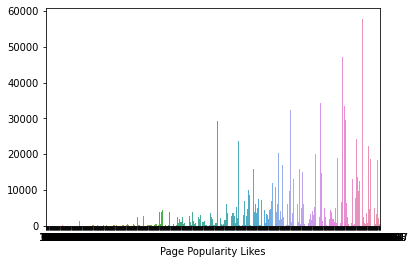

In [35]:
sns.barplot(y=viz1.values, x=viz1.index)

As we expected, pages most liked have more comments on their posts than unpopular ones

### Comparaison between Comments/Category and Page Popularity/Category

Just a simple analysis to see which page category are the most influential : ones who have the most like and ones which generate the most comments

In [36]:
viz2 = df1.groupby("Page Category Name")["Page Popularity Likes"].unique()
i = 0
for val in viz2.values:
    viz2.values[i] = val.sum()
    i+=1
    
viz=viz2.sort_values(ascending=False)

<AxesSubplot:ylabel='Page Category Name'>

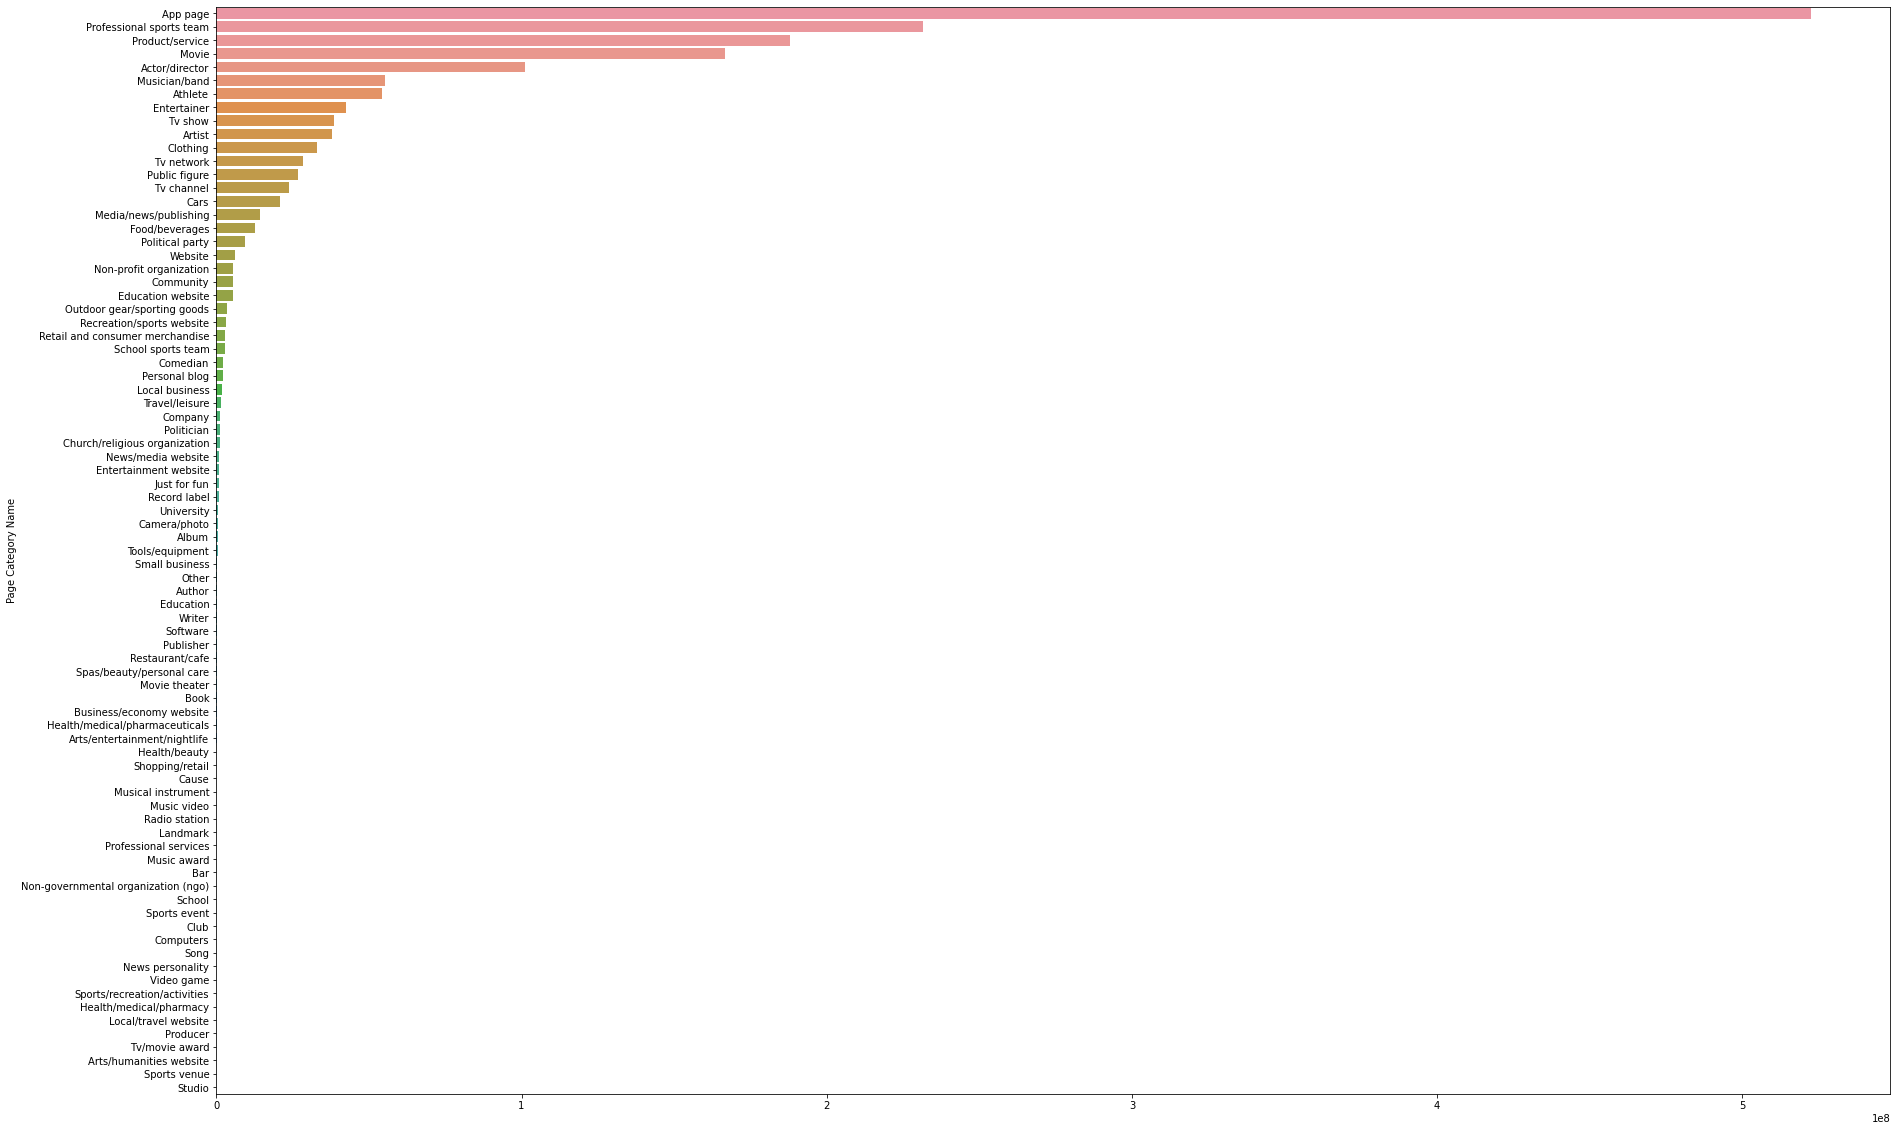

In [37]:
plt.figure(figsize=(30,20))
sns.barplot(x=viz.values, y=viz.index)

In [38]:
viz3 = df1.groupby("Page Category Name")["CC1"].sum()
viz = viz3.sort_values(ascending=False)

<AxesSubplot:ylabel='Page Category Name'>

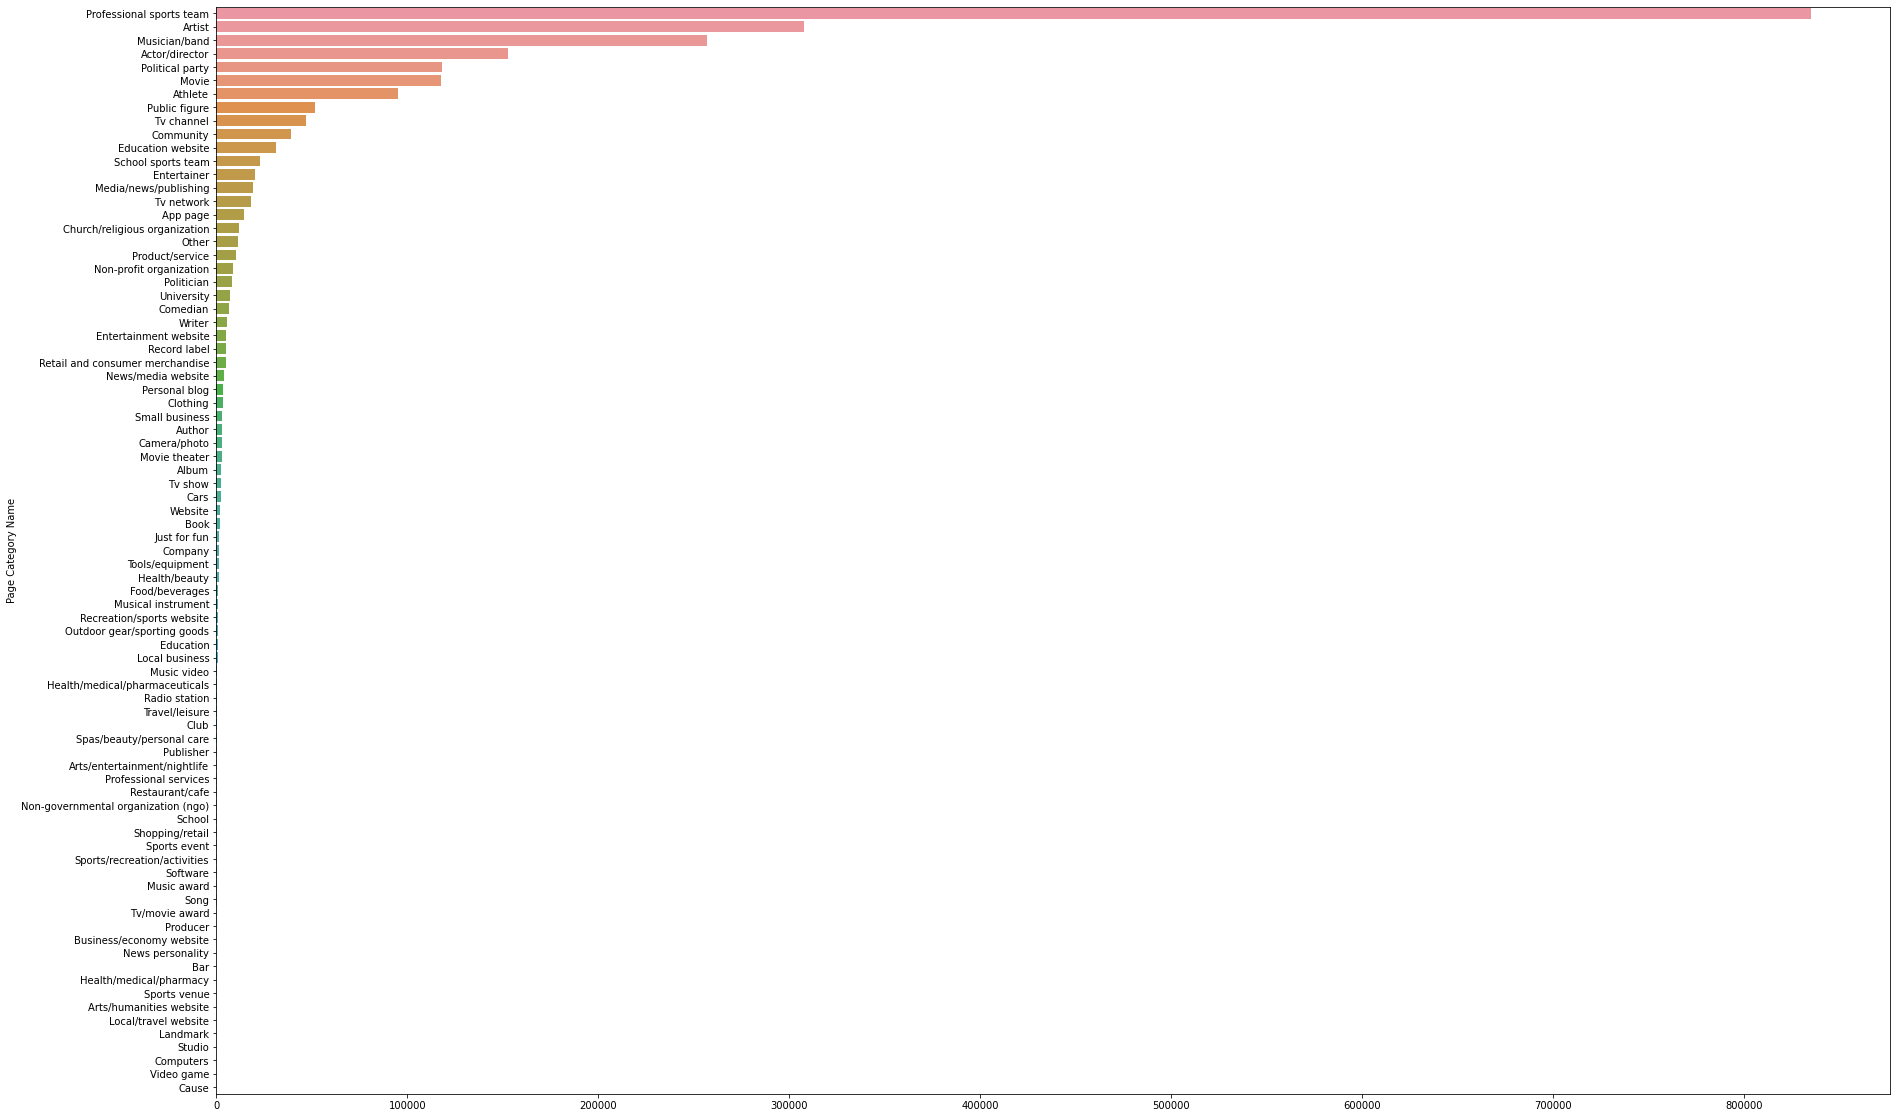

In [39]:
plt.figure(figsize=(30,20))
sns.barplot(x=viz.values, y=viz.index)

# Data Modeling

In [51]:
path = r"./dataset/Training/"

training_files = ['Features_Variant_1.csv', 'Features_Variant_2.csv', 'Features_Variant_3.csv', 
                 'Features_Variant_4.csv', 'Features_Variant_5.csv']

In [82]:
all_train = pd.concat([pd.read_csv(path + file, index_col=False, header=None) for file in training_files ], sort=False)

In [72]:
X_all_train = all_train.iloc[:,:-1]
y_all_train = all_train.iloc[:,-1:]

X_train_list = []
y_train_list = []

In [74]:
for i in range(5):
    X_train_list.append(pd.read_csv(path + training_files[i], index_col=False, header=None).iloc[:,:-1])
    y_train_list.append(pd.read_csv(path + training_files[i], index_col=False, header=None).iloc[:,-1:])

X_train_list.append(X_train_all)
y_train_list.append(y_train_all)

In [71]:
pathTest = r"./dataset/Testing/TestSet/"

test_files = ['Test_Case_1.csv', 'Test_Case_2.csv', 'Test_Case_3.csv',
              'Test_Case_4.csv', 'Test_Case_5.csv', 'Test_Case_5.csv', 
              'Test_Case_6.csv', 'Test_Case_7.csv', 'Test_Case_8.csv', 
              'Test_Case_9.csv', 'Test_Case_10.csv']
for file in test_files:
    test = pd.concat([pd.read_csv(pathTest + file)])
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1:]

## Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
for i in range(6):
    lin_reg.fit(X_train_list[i], y_train_list[i])
    y_pred = lin_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    if i == 5:
        print("Variant global: ", rmse)
    else:
        print("Variant {0}: ".format(i + 1), rmse)

Variant 1:  76.03339326813649
Variant 2:  69.4767357808303
Variant 3:  65.81800233065623
Variant 4:  74.23468686798128
Variant 5:  88.85623287053569
Variant global:  69.00928537125786


In [89]:
r2_score(y_test, y_pred)

0.6674508039177438

## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=12, random_state=42)

for i in range(6):
    tree_reg.fit(X_train_list[i], y_train_list[i])
    y_pred = tree_reg.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    if i == 5:
        print("Variant global: ", rmse)
    else:
        print("Variant {0}: ".format(i + 1), rmse)

Variant 1:  99.69758326175952
Variant 2:  90.26985555483283
Variant 3:  69.01317288976026
Variant 4:  124.71699017658327
Variant 5:  82.99734588082623
Variant global:  60.52922905258934


In [91]:
r2_score(y_test, y_pred)

0.7441584208645835

## Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
gradientboosting = GradientBoostingRegressor(max_depth=6, n_estimators=3, learning_rate=1.0, random_state=42)

for i in range(6):
    gradientboosting.fit(X_train_list[i], y_train_list[i])
    y_pred = gradientboosting.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    if i == 5:
        print("Variant global: ", rmse)
    else:
        print("Variant {0}: ".format(i + 1), rmse)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Variant 1:  72.08202510646413


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Variant 2:  132.0942865708095


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Variant 3:  62.42685200771992


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Variant 4:  69.976025176945


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Variant 5:  65.00015454159228


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Variant global:  82.90077871909423


In [95]:
r2_score(y_test, y_pred)

0.520091919716027

## Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(max_depth=8, random_state=0, n_estimators=100)

for i in range(6):
    randomforest.fit(X_train_list[i], y_train_list[i])
    y_pred = randomforest.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    
    if i == 5:
        print("Variant global: ", rmse)
    else:
        print("Variant {0}: ".format(i + 1), rmse)

<ipython-input-96-f2c9cf2893af>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train_list[i], y_train_list[i])


Variant 1:  62.72319832739916


<ipython-input-96-f2c9cf2893af>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train_list[i], y_train_list[i])


Variant 2:  60.59545223746803


<ipython-input-96-f2c9cf2893af>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train_list[i], y_train_list[i])


Variant 3:  51.87744830754677


<ipython-input-96-f2c9cf2893af>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train_list[i], y_train_list[i])


Variant 4:  69.57726931681685


<ipython-input-96-f2c9cf2893af>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train_list[i], y_train_list[i])


Variant 5:  57.46927911957149


<ipython-input-96-f2c9cf2893af>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train_list[i], y_train_list[i])


Variant global:  57.8040005639679


In [98]:
r2_score(y_test, y_pred)

0.7666774923774052

### This Random Forest model takes the longest time, but has the best scores. We're taking it for the API

# Comparison of Models

In [105]:
models = ["Linear Regression", "Decision Tree","Gradient Boosting", "Random Forest"]
MSE = [69,60.52,83,57.8]
r2 = [0.67,0.74,0.52,0.76]

Text(0.5, 1.0, 'R2 score by model')

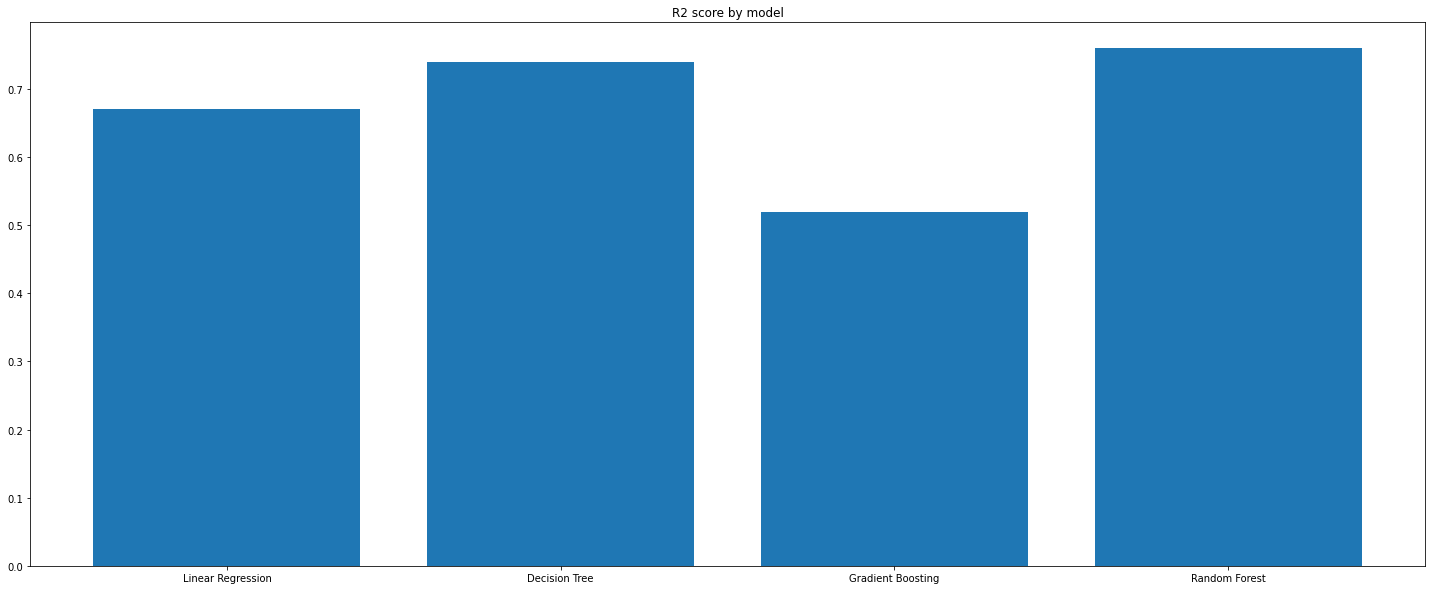

In [108]:
fig = plt.figure(1, figsize=(25, 10))
plt.bar(models, r2)
plt.title("R2 score by model")

Text(0.5, 1.0, 'MSE score by model')

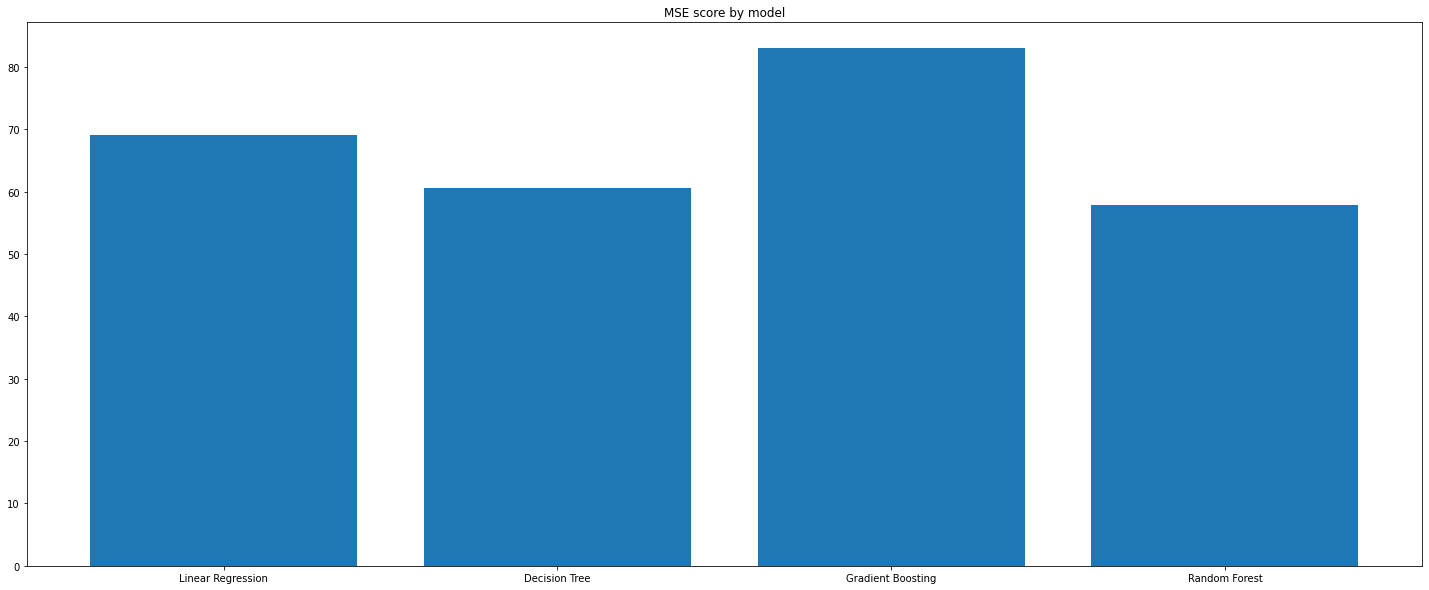

In [109]:
fig = plt.figure(1, figsize=(25, 10))
plt.bar(models, MSE)
plt.title("MSE score by model")

In [ ]:
import pickle
pickle.dump(randomforest, open('final_prediction.pickle', 'wb'))